<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/BA_Sklearn_Regresion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomatura en **Business Analytics** - FCEJ/UdA - **Sklearn - Regresión 01**

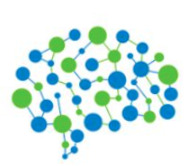

## Carga de librerías necesarias

In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
import patsy
import seaborn as sns
import altair as alt
import matplotlib as plt
from matplotlib import pyplot
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Extracción de Datos - Creación del DataFrame

Una Inmobiliaria de Mendoza quiere comprender y modelar la relación entre los precios de la propiedad y conocer los atributos clave de las propiedades, teniendo en cuenta la tasa de Inseguridad y el valor medio de las viviendas. 

Este es un problema de Ciencia de Datos y se puede abordar mediante regresión.


In [2]:
datos_url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Mendoza.csv"

In [3]:
datosMendoza = pd.read_csv(datos_url, sep=";")
datosMendoza.head()

,Inseguridad,Terrenos2300mts,AreasComerciales,CercaniaRio,Smog,MediaHabitaciones,PropocionCasasAntiguas,DistanciaCentro,AccesoCorredor,ImpuestoInmobiliario,ProporAlumnoProfesor,NivelVecinos,ValorMedioVivienda
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Tipos de datos del DataFrame y tamaño

In [4]:
datosMendoza.shape

(506, 13)

In [5]:
datosMendoza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inseguridad             506 non-null    float64
 1   Terrenos2300mts         506 non-null    float64
 2   AreasComerciales        506 non-null    float64
 3   CercaniaRio             506 non-null    int64  
 4   Smog                    506 non-null    float64
 5   MediaHabitaciones       506 non-null    float64
 6   PropocionCasasAntiguas  506 non-null    float64
 7   DistanciaCentro         506 non-null    float64
 8   AccesoCorredor          506 non-null    int64  
 9   ImpuestoInmobiliario    506 non-null    int64  
 10  ProporAlumnoProfesor    506 non-null    float64
 11  NivelVecinos            506 non-null    float64
 12  ValorMedioVivienda      506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
datosMendoza.describe()

,Inseguridad,Terrenos2300mts,AreasComerciales,CercaniaRio,Smog,MediaHabitaciones,PropocionCasasAntiguas,DistanciaCentro,AccesoCorredor,ImpuestoInmobiliario,ProporAlumnoProfesor,NivelVecinos,ValorMedioVivienda
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Como se puede apreciar el conjunto de datos tiene 506 filas con 13 variables. El conjunto de variables tiene variables categóricas y numéricas. El resumen de estadística descriptiva es solo para los datos numéricos.

In [7]:
datosMendoza.describe().T

,count,mean,std,min,25%,50%,75%,max
Inseguridad,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
Terrenos2300mts,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
AreasComerciales,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CercaniaRio,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
Smog,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
MediaHabitaciones,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
PropocionCasasAntiguas,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DistanciaCentro,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
AccesoCorredor,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
ImpuestoInmobiliario,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Eliminando Valores Nulos y Valores Duplicados

In [8]:
datosMendoza = datosMendoza.dropna()

Para verificar los valores faltantes (valores nulos) en el DataFrame se utiliza el método dropna() de Pandas para encontrar y eliminar los valores faltantes

In [9]:
datosMendoza = datosMendoza.drop_duplicates()

Para verificar registros duplicados en el DataFrame se utiliza el método drop_duplicates() de Pandas

# Creación del Modelo Regresión Lineal Simple


## Conjunto de Datos de Entrenamiento y Conjunto de Datos de Prueba

Dividir sus datos en subconjuntos de entrenamiento y prueba le permite usar algunos de los datos para entrenar su modelo (es decir, le permite construir un modelo que aprende las relaciones entre las variables) y el resto de los datos para probar su modelo ( es decir, para ver qué tan bien su nuevo modelo puede hacer predicciones cuando se le dan nuevos datos).

In [10]:
X = datosMendoza.drop("Inseguridad", axis = 1)
y = datosMendoza[["Inseguridad"]]

Se define la variable objetivo "Inseguridad", es decir como variable dependiente, el resto de las variables serán variables independientes

In [11]:
datosMendoza.head()

,Inseguridad,Terrenos2300mts,AreasComerciales,CercaniaRio,Smog,MediaHabitaciones,PropocionCasasAntiguas,DistanciaCentro,AccesoCorredor,ImpuestoInmobiliario,ProporAlumnoProfesor,NivelVecinos,ValorMedioVivienda
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [12]:
seed = 10 
test_data_size = 0.3 

Elegimos un tamaño de datos de prueba del 30%, que es 0.3. La función train_test_split se utiliza para lograr esto. Se establece la semilla del generador de números aleatorios para que podamos obtener una división reproducible cada vez que ejecutamos este código. Se utiliza un valor arbitrario de 10

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)

In [14]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

## Generación del Modelo de Regresión Lineal Simple

Este es un modelo de regresión lineal simple donde la tasa de "Inseguridad" es la variable dependiente y el "Valor Medio de las Viviendas" es la variable independiente. Usamos statsmodels para crear un modelo de regresión lineal.

In [22]:
datosMendoza.columns

Index(['Inseguridad', 'Terrenos2300mts', 'AreasComerciales', 'CercaniaRio',
       'Smog', 'MediaHabitaciones', 'PropocionCasasAntiguas',
       'DistanciaCentro', 'AccesoCorredor', 'ImpuestoInmobiliario',
       'ProporAlumnoProfesor', 'NivelVecinos', 'ValorMedioVivienda'],
      dtype='object')

In [19]:
ModeloLinealSimple = smf.ols(formula="Inseguridad ~ ValorMedioVivienda", data=train_data)

In [29]:
ModeloLinealSimpleResultado = ModeloLinealSimple.fit()

El ajuste es la estimación de los coeficientes de regresión (parámetros) utilizando el método de mínimos cuadrados ordinarios.

In [30]:
print(ModeloLinealSimpleResultado.summary())

                            OLS Regression Results                            
Dep. Variable:            Inseguridad   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.56e-13
Time:                        23:07:23   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.2094      1

En la esquina superior izquierda encontramos la variable dependiente del modelo. 

El valor estadístico denominado $R^2$ proporciona una medida de la variabilidad en la variable dependiente (0.144). Puede interpretarse como una medida de qué tan bien se ajusta nuestro modelo al conjunto de datos.



La ecuación de nuestro modelo es: $ Y = 11,2094 - 0,3502 x $

Tambien se puede comparar los valores $p$ con el nivel $\alpha$ de 0,05. 

Si una variable independiente tiene un valor $p$ menor que 0.05, la variable independiente es estadísticamente significativa en nuestro modelo para explicar la variabilidad en la variable dependiente. 

Si el valor $p$ es 0.05 o mayor, la variable independiente particular (o término) en nuestro modelo no es estadísticamente significativa. 

Lo que esto significa es que ese término en nuestro modelo no contribuye a explicar estadísticamente la variabilidad en nuestra variable dependiente.

# Regresión Lineal Múltiple

In [23]:
datosMendoza.columns

Index(['Inseguridad', 'Terrenos2300mts', 'AreasComerciales', 'CercaniaRio',
       'Smog', 'MediaHabitaciones', 'PropocionCasasAntiguas',
       'DistanciaCentro', 'AccesoCorredor', 'ImpuestoInmobiliario',
       'ProporAlumnoProfesor', 'NivelVecinos', 'ValorMedioVivienda'],
      dtype='object')

In [24]:
ModeloLinealMultiple = smf.ols(formula="Inseguridad ~ ValorMedioVivienda + AreasComerciales + Smog + NivelVecinos + ImpuestoInmobiliario", data=train_data)

In [25]:
ModeloLinealMultipleResultado = ModeloLinealMultiple.fit()
print(ModeloLinealMultipleResultado.summary())

                            OLS Regression Results                            
Dep. Variable:            Inseguridad   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     36.52
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.75e-30
Time:                        22:56:03   Log-Likelihood:                -1170.2
No. Observations:                 354   AIC:                             2352.
Df Residuals:                     348   BIC:                             2376.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.9557 

En la esquina superior izquierda encontramos la variable dependiente del modelo. 

El valor estadístico denominado $R^2$ proporciona una medida de la variabilidad en la variable dependiente y ahora el valor es (0.344). 

La ecuación de nuestro modelo es: $ Y = -6,9557 - 0,0809 x_1 - 0,1561 x_2 + 3,6715 x_3 + 0,1335 x_4 + 0,0247 x_5$


Un objetivo principal del análisis de regresión es encontrar un modelo que explique la variabilidad observada en una variable dependiente de interés. Por lo tanto, es muy importante tener una cantidad que mida qué tan bien un modelo de regresión explica esta variabilidad. La estadística que hace esto se llama $R^2$. 

A veces, también se le llama coeficiente de determinación. 

## Matriz de Correlación

La correlación es una medida que indica cómo dos variables fluctúan juntas. Cualquier valor de correlación de 1, o cercano a 1, indica que esas variables están altamente correlacionadas. Las variables altamente correlacionadas a veces pueden dañar la veracidad de los modelos y, en muchas circunstancias, tomamos la decisión de eliminar tales variables o combinarlas para formar variables compuestas o interactivas.

In [17]:
set_option("precision",3)
correlacionMendoza = train_data.corr(method = "pearson")
correlacionMendoza

,Terrenos2300mts,AreasComerciales,CercaniaRio,Smog,MediaHabitaciones,PropocionCasasAntiguas,DistanciaCentro,AccesoCorredor,ImpuestoInmobiliario,ProporAlumnoProfesor,NivelVecinos,ValorMedioVivienda,Inseguridad
Terrenos2300mts,1.000,-0.540,-0.059,-0.520,0.355,-0.577,0.659,-0.312,-0.324,-0.425,-0.436,0.423,-0.198
AreasComerciales,-0.540,1.000,0.065,0.758,-0.399,0.668,-0.729,0.581,0.703,0.399,0.607,-0.508,0.387
CercaniaRio,-0.059,0.065,1.000,0.091,0.108,0.106,-0.099,0.023,-0.008,-0.094,-0.041,0.137,-0.045
Smog,-0.520,0.758,0.091,1.000,-0.307,0.742,-0.776,0.607,0.662,0.207,0.604,-0.453,0.406
MediaHabitaciones,0.355,-0.399,0.108,-0.307,1.000,-0.263,0.215,-0.183,-0.280,-0.351,-0.587,0.667,-0.167
PropocionCasasAntiguas,-0.577,0.668,0.106,0.742,-0.263,1.000,-0.751,0.459,0.515,0.290,0.640,-0.419,0.356
DistanciaCentro,0.659,-0.729,-0.099,-0.776,0.215,-0.751,1.000,-0.495,-0.543,-0.259,-0.522,0.290,-0.379
AccesoCorredor,-0.312,0.581,0.023,0.607,-0.183,0.459,-0.495,1.000,0.909,0.462,0.457,-0.383,0.609
ImpuestoInmobiliario,-0.324,0.703,-0.008,0.662,-0.280,0.515,-0.543,0.909,1.000,0.463,0.528,-0.479,0.565
ProporAlumnoProfesor,-0.425,0.399,-0.094,0.207,-0.351,0.290,-0.259,0.462,0.463,1.000,0.375,-0.504,0.277


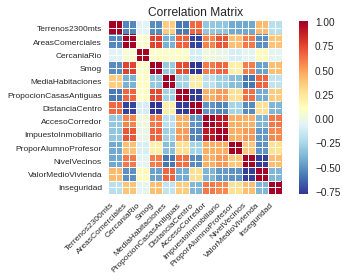

In [18]:
corrMatrix = train_data.corr(method = "pearson")
xnames=list(train_data.columns)
ynames=list(train_data.columns)
Matriz = plot_corr(corrMatrix, xnames=xnames, ynames=ynames, title=None, normcolor=False, cmap='RdYlBu_r')